# Binary Classification

In [132]:
import torch 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

torch.manual_seed(42)

In [133]:
import torch
import matplotlib.pyplot as plt

torch.manual_seed(42)

def generate_dataset(n, m):
    X = torch.rand(n, m - 1)
    n_samples, n_features = X.shape
    hiddens = torch.rand(n_features, 1) + 1
    y = (X @ hiddens > 1.3)*1.0 # Convert to integers (0 or 1)
    return X, y, hiddens

X, y, hiddens = generate_dataset(100, 3)

# X = X.numpy()  # Convert PyTorch tensor X to a NumPy array
# y = y.numpy()  # Convert PyTorch tensor y to a NumPy array

# markers = ['o', 's']  # Define markers for each class
# colors = ['blue', 'red']  # Define colors for each class

# for i in range(2):  # Iterate over the two classes
#     class_indices = y == i
#     plt.scatter(X[class_indices.squeeze(), 0], X[class_indices.squeeze(), 1], label=f'Class {i}', marker=markers[i], s=20, c=colors[i])

# plt.title('Scatter Plot of Binary Class Data')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.legend()
# plt.grid(True)
# plt.show()


 epoch 0 loss : 0.7278569936752319
 epoch 1 loss : 0.7277776598930359
 epoch 2 loss : 0.7276985049247742
 epoch 3 loss : 0.7276193499565125
 epoch 4 loss : 0.727540135383606
 epoch 5 loss : 0.727461040019989
 epoch 6 loss : 0.7273820638656616
 epoch 7 loss : 0.7273030877113342
 epoch 8 loss : 0.7272241115570068
 epoch 9 loss : 0.727145254611969
 epoch 10 loss : 0.7270663976669312
 epoch 11 loss : 0.7269876003265381
 epoch 12 loss : 0.7269088625907898
 epoch 13 loss : 0.726830244064331
 epoch 14 loss : 0.7267515659332275
 epoch 15 loss : 0.7266730666160583
 epoch 16 loss : 0.7265945672988892
 epoch 17 loss : 0.7265160083770752
 epoch 18 loss : 0.7264376282691956
 epoch 19 loss : 0.7263592481613159
 epoch 20 loss : 0.7262809872627258
 epoch 21 loss : 0.7262026071548462
 epoch 22 loss : 0.7261244058609009
 epoch 23 loss : 0.7260462045669556
 epoch 24 loss : 0.7259681820869446
 epoch 25 loss : 0.7258901000022888
 epoch 26 loss : 0.7258120775222778
 epoch 27 loss : 0.7257341146469116
 epoch

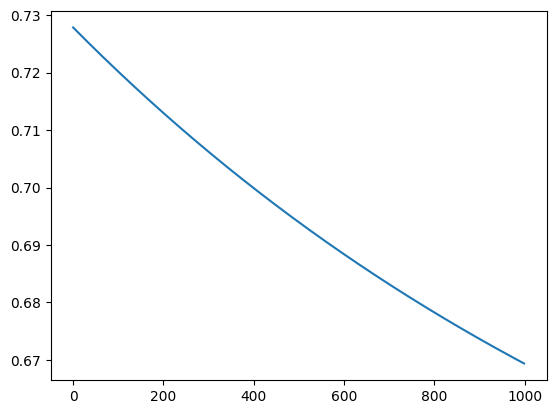

In [134]:
import torch
import matplotlib.pyplot as plt
from torch  import nn

torch.manual_seed(42)

def generate_dataset(n, m):
    X = torch.rand(n, m - 1)
    n_samples, n_features = X.shape
    hiddens = torch.rand(n_features, 1) + 1
    y = (X @ hiddens > 1.3)*1 # Convert to integers (0 or 1)
    return X, y, hiddens

X, y, hiddens = generate_dataset(100, 3)


n_samples, n_features = X.shape

model = nn.Sequential(
    nn.Linear(n_features,1),
    nn.Sigmoid()
)

criteria = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

epochs=1000
losses = []

for epoch in range(epochs):
    optimizer.zero_grad() # reseting the gradient for each iteration
    output = model(X) 
    loss = criteria(output,y.float())
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    print(f" epoch {epoch} loss : {loss.item()}")

plt.plot(losses)



In [135]:
print(f" hiddens {hiddens} model {model.state_dict()}")

 hiddens tensor([[1.0459],
        [1.3155]]) model OrderedDict([('0.weight', tensor([[0.5110, 0.2687]])), ('0.bias', tensor([-0.2605]))])


# Revisit

 epoch 4998 loss : 0.32670173048973083


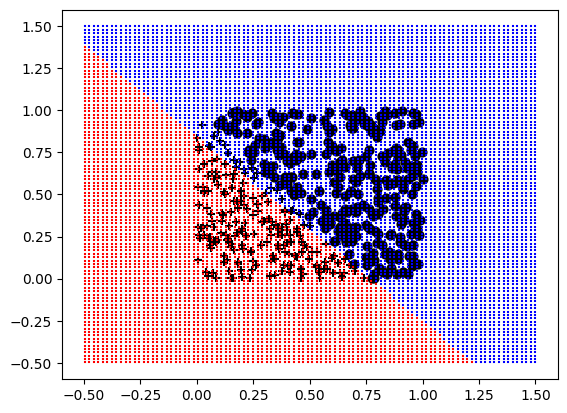

 epoch 4999 loss : 0.3266575336456299


 hiddens tensor([[1.7294],
        [1.2729]]) model OrderedDict([('0.weight', tensor([[3.5006, 3.1944]])), ('0.bias', tensor([-2.6931]))])


In [236]:
def plotData(X,y):
    import numpy as np
    # Plotting Everything 
    y_n = y.numpy()
    zero_indices = (y_n==0).squeeze()
    one_indices = (y_n==1).squeeze()


    plt.scatter(X.numpy()[zero_indices,0],X.numpy()[zero_indices,1],s=40,marker='+', c='k')
    plt.scatter(X.numpy()[one_indices,0],X.numpy()[one_indices,1],s=40,marker='o', c='k')


from time import sleep
from IPython import display



def plotClassificationModel(X,model):
    x1_min, x1_max = X[:, 0].min() -0.5, X[:, 0].max() + 0.5
    x2_min, x2_max = X[:, 1].min() -0.5, X[:, 1].max() + 0.5

    x1= torch.linspace(x1_min, x1_max, 100)
    x2= torch.linspace(x2_min, x2_max, 100)

    # Generate all combinations of x1 and x2 pairs
    xx, yy = torch.meshgrid(x1, x2)


    # print(xx.shape, yy.shape)
    # # Flatten the grid into two separate 1D tensors
    x1_mesh, x2_mesh = xx.flatten(), yy.flatten()


    # print(x1_mesh.shape, x2_mesh.shape)


    X_tensor = torch.stack((x1_mesh, x2_mesh), dim=1)
    # # torch.tensor(np.hstack([x1,x2])).reshape(100,-1)


    # print(X_tensor.shape)



    Z = model(X_tensor)
    Z = Z > 0.5


    zero_indices = (Z==False).squeeze()
    one_indices = (Z==True).squeeze()


    plt.scatter(X_tensor.numpy()[zero_indices,0],X_tensor.numpy()[zero_indices,1],s=1,marker='+',c='r')
    plt.scatter(X_tensor.numpy()[one_indices,0],X_tensor.numpy()[one_indices,1],s=1,marker='+',c='b')
    plt.show()
    
    

    






import torch
import matplotlib.pyplot as plt

torch.manual_seed(42)

def generate_dataset(n, m):
    X = torch.rand(n, m - 1)
    n_samples, n_features = X.shape
    hiddens = torch.rand(n_features, 1) + 1
    y = (X @ hiddens > 1.3)*1.0 # Convert to integers (0 or 1)
    return X, y, hiddens

# def generate_dataset(n, m):
#     X = torch.rand(n, m - 1)
#     n_samples, n_features = X.shape
#     hiddens = torch.rand(n_features, 1) + 1

#     # Ensure balanced distribution of 0s and 1s
#     y = []
#     half_n = n // 2
#     for i in range(n):
#         if len(y) < half_n:
#             y.append(0)
#         else:
#             y.append(1)

#     y = torch.tensor(y, dtype=torch.float).unsqueeze(1)

#     return X, y, hiddens

X, y, hiddens = generate_dataset(500, 3)


n_samples, n_features = X.shape

model = nn.Sequential(
    nn.Linear(n_features,1),
    nn.Sigmoid()
)

criteria = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# torch.optim.SGD(model.parameters(), lr=0.1)

epochs=5000
losses = []
# plt = plt

for epoch in range(epochs):
    optimizer.zero_grad() # reseting the gradient for each iteration
    output = model(X) 
    loss = criteria(output,y.float())
    loss.backward()
    optimizer.step()
    if epoch%1==0:
        plotData(X,y)
        plotClassificationModel(X,model)
        sleep(0.05)
    if epoch!=epochs-1:
       display.clear_output(wait=True)
       


    losses.append(loss.item())
    print(f" epoch {epoch} loss : {loss.item()}")

# plt.plot(losses)


print("\n")
print(f" hiddens {hiddens} model {model.state_dict()}")


torch.Size([100, 100]) torch.Size([100, 100])
torch.Size([10000]) torch.Size([10000])
torch.Size([10000, 2])


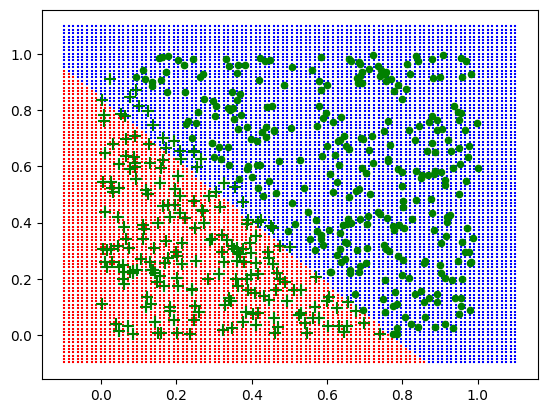

In [238]:


def plotData(X,y):
    import numpy as np
    # Plotting Everything 
    y_n = y.numpy()
    zero_indices = (y_n==0).squeeze()
    one_indices = (y_n==1).squeeze()


    plt.scatter(X.numpy()[zero_indices,0],X.numpy()[zero_indices,1],s=80,marker='+',c='g')
    plt.scatter(X.numpy()[one_indices,0],X.numpy()[one_indices,1],s=20,marker='o',c='g')




def plotClassificationModel(X,model):
    x1_min, x1_max = X[:, 0].min() -0.1, X[:, 0].max() +0.1
    x2_min, x2_max = X[:, 1].min() -0.1, X[:, 1].max() +0.1

    x1= torch.linspace(x1_min, x1_max, 100)
    x2= torch.linspace(x2_min, x2_max, 100)

    # Generate all combinations of x1 and x2 pairs
    xx, yy = torch.meshgrid(x1, x2)


    print(xx.shape, yy.shape)
    # # Flatten the grid into two separate 1D tensors
    x1_mesh, x2_mesh = xx.flatten(), yy.flatten()


    print(x1_mesh.shape, x2_mesh.shape)


    X_tensor = torch.stack((x1_mesh, x2_mesh), dim=1)
    # # torch.tensor(np.hstack([x1,x2])).reshape(100,-1)


    print(X_tensor.shape)



    Z = model(X_tensor)
    Z = Z > 0.5


    zero_indices = (Z==False).squeeze()
    one_indices = (Z==True).squeeze()


    plt.scatter(X_tensor.numpy()[zero_indices,0],X_tensor.numpy()[zero_indices,1],s=1,marker='+',c='r')
    plt.scatter(X_tensor.numpy()[one_indices,0],X_tensor.numpy()[one_indices,1],s=1,marker='+',c='b')

plotClassificationModel(X,model)
plotData(X,y)

# Ipython

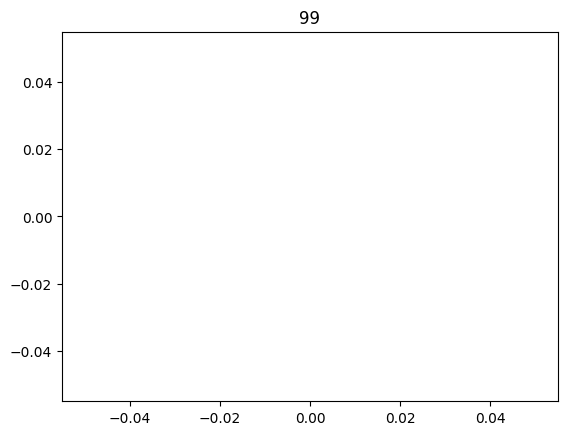

In [206]:
from time import sleep
from IPython import display

for i in range(100):
    display.clear_output(wait=True)
    plt.plot()
    plt.title(i)
    plt.show()
    sleep(0.5)
